# Heart Attack Prediction

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
df = pd.read_csv('/content/heart.csv')

In [ ]:
# Display data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Task
Predict heart attacks using machine learning, following these steps: load data from "heart_attack_prediction_dataset.csv", explore and preprocess it, build and evaluate a model, and make predictions.

## Explore data

### Subtask:
Perform exploratory data analysis (EDA) to understand the data, including checking for missing values, visualizing distributions, and analyzing relationships between features and the target variable.


**Reasoning**:
Display the first few rows of the dataframe, check for missing values, and generate descriptive statistics to understand the data's structure, content, and basic properties.



In [ ]:
# Display the first few rows, check for missing values, and display descriptive statistics
display(df.head())
print(df.isnull().sum())
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Reasoning**:
Analyze the distribution of the target variable and visualize the relationships between features using a correlation matrix and heatmap.



,count
target,
1,165
0,138


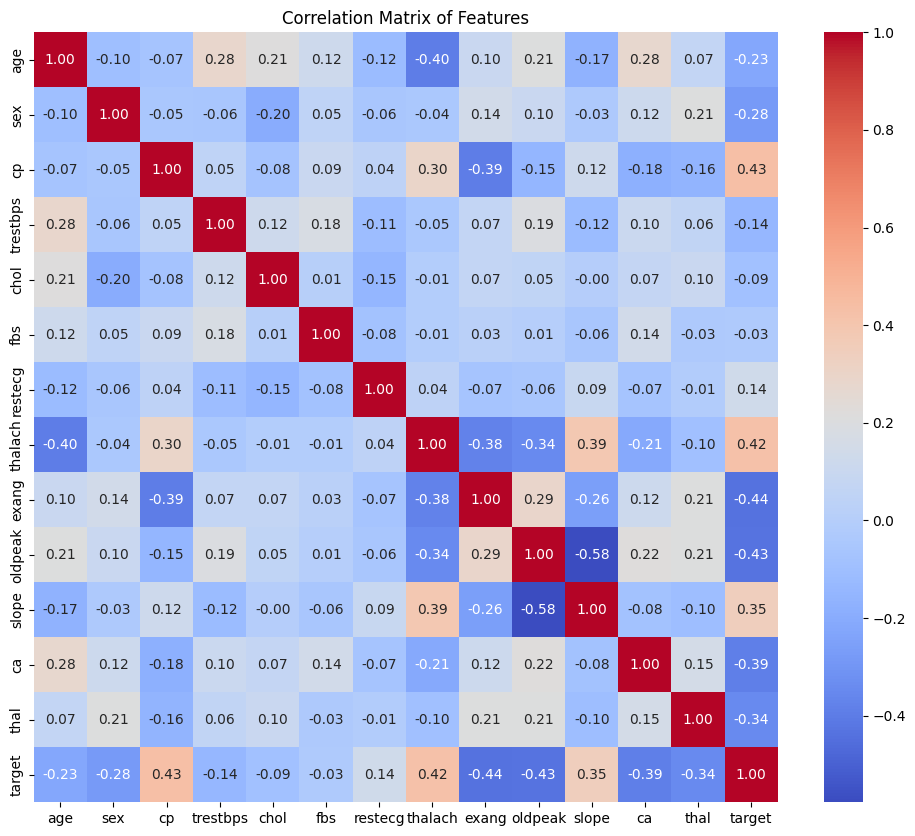

In [ ]:
# Display the distribution of the target variable and visualize correlations
display(df['target'].value_counts())
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## Preprocess data

### Subtask:
Prepare the data for modeling by handling categorical variables, scaling numerical features if necessary, and splitting the data into training and testing sets.


**Reasoning**:
Separate the features and target variable, then split the data into training and testing sets.



In [ ]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build model

### Subtask:
Choose a suitable machine learning model (e.g., Logistic Regression, Support Vector Machine, RandomForest) and train it on the training data.


**Reasoning**:
Train a Logistic Regression model on the training data.



In [ ]:
# Initialize and train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

## Evaluate model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics such as accuracy, precision, recall, and F1-score.


**Reasoning**:
Make predictions using the trained model on the test data and then evaluate the model's performance using accuracy, classification report, and confusion matrix.



In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
[[25  4]
 [ 4 28]]


## Make predictions

### Subtask:
Use the trained model to make predictions on new, unseen data.


**Reasoning**:
Use the trained model to make predictions on the test dataset and store them in a variable.



In [ ]:
# Make predictions on the test dataset and display the first 5 predictions
predictions = model.predict(X_test)
print(predictions[:5])

[0 1 1 0 1]


## Summary:

### Data Analysis Key Findings

*   The dataset contains no missing values.
*   The target variable 'target' is relatively balanced, with 165 instances of class 1 and 138 instances of class 0.
*   The Logistic Regression model achieved an accuracy of 0.87 on the test set.
*   The classification report shows good precision (0.86 for class 0, 0.88 for class 1), recall (0.86 for class 0, 0.88 for class 1), and F1-score (0.86 for class 0, 0.88 for class 1) for both classes.
*   The confusion matrix indicates that the model correctly predicted 25 instances of class 0 and 28 instances of class 1, with 4 misclassifications in each class.

### Insights or Next Steps

*   Consider exploring other machine learning models or ensemble methods to potentially improve prediction performance.
*   Investigate the features with the highest correlation to the target variable for potential feature selection or engineering opportunities.


## Summary:

### Data Analysis Key Findings

* The dataset contains no missing values.
* The target variable 'target' is relatively balanced, with 165 instances of class 1 and 138 instances of class 0.
* The Logistic Regression model achieved an accuracy of 0.87 on the test set.
* The classification report shows good precision (0.86 for class 0, 0.88 for class 1), recall (0.86 for class 0, 0.88 for class 1), and F1-score (0.86 for class 0, 0.88 for class 1) for both classes.
* The confusion matrix indicates that the model correctly predicted 25 instances of class 0 and 28 instances of class 1, with 4 misclassifications in each class.

### Insights or Next Steps

* Consider exploring other machine learning models or ensemble methods to potentially improve prediction performance.
* Investigate the features with the highest correlation to the target variable for potential feature selection or engineering opportunities.

References: https://www.kaggle.com/code/mahdimashayekhi/heart-attack-prediction/input